In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.shape

(150, 4)

In [6]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

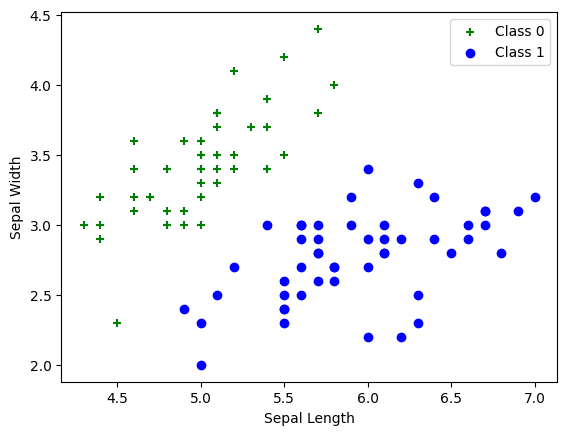

In [11]:
import matplotlib.pyplot as plt

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+', label='Class 0')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='o', label='Class 1')
plt.legend()
plt.show()

In [13]:
x = df.drop(['target'],axis=1)
y = df.target

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
len(x_train)

120

In [17]:
len(x_test)

30

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [23]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
knn.score(x_test,y_test)

0.9666666666666667

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test,y_pred)

cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'truth')

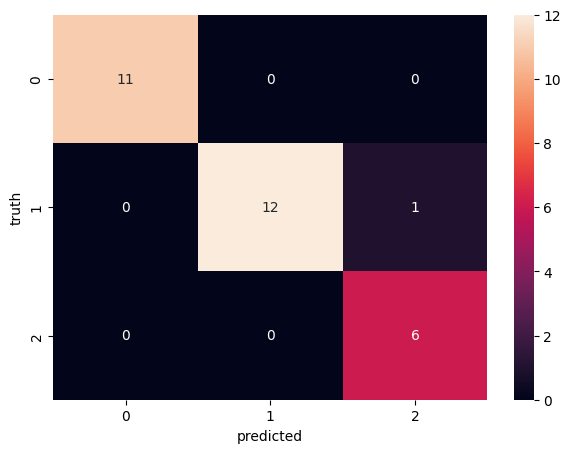

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

